## Experiment-1: 

<br/><br/>
<font size="5", color="MediumBlue">
<b>Preliminaries</b><br/><br/>
</font>
<font size="4", color="MediumBlue">
<b>Simple distribution + Complex deterministic transformation  =  Complex distribution</b>
</font>

<hr>
<font color="MidNightBlue">
You can post your queries on the google group: https://groups.google.com/forum/#!categories/summer-school-on-machine-learning-2017/lab-4
</font>
<hr>

<hr>
<font size="2", color="RoyalBlue">
One clever way to model a complicated probability distribution is to model it as a complicated deterministic transformation of a simple distribution like a Gaussian or a multinomial distribution. This method allows us to  use of sophisticated deterministic models to represent stochastic distributions. Deep generative models make use of this key idea and use deep deterministic neural networks for modelling complicated probability distributions related to real world data.
</font>
<hr>

In [1]:
##########################
# Import necessary modules
##########################

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


<hr>
<font size="2", color="RoyalBlue">
Let's consider the following C-shaped probability distribution,
<img src="images/c_dist.png", width="300", align=”left”>
How can we model the above distribution?

Here, we will try to model the above distribution as a deterministic transformation of the canonical Gaussian distribution. Specifically, we take a 2-D sample  $z$ that is sampled from a 2-D Canonical Gaussian. Then we apply a deterministic transformation to transform it into an output 2-D sample $x$ which follows the C-shaped distribution.
</font>
<hr>

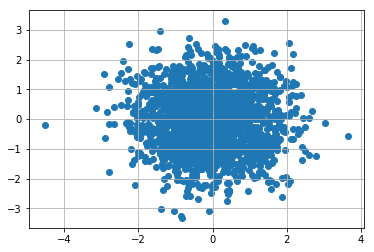

In [2]:
###############################
# Simple Distribution: Gaussian
###############################

numSamples = 2000;

z = np.random.randn(numSamples,2)               # Sample from Gaussian distribution

z1 = z[:,0]
z2 = z[:,1]

plt.scatter(z1,z2)
plt.hold()
plt.grid(True)
plt.show()


<hr>
<font size="2", color="RoyalBlue">
Now let's apply an appropriate deterministic function to the samples from the canonical Gaussian distribution, so that they become samples of the C-shaped distribution.
</font>
<hr>

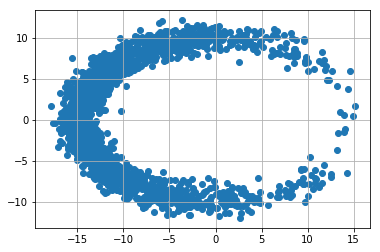

In [3]:
############################################
# Deterministically transforming the samples
############################################

os = 10
ost = np.pi/2

x1 = -(1.5*os+z1)*(np.sin(z2+ost))
x2 = (os+z1)*np.cos(z2+ost)

plt.scatter(x1,x2)
plt.hold()
plt.grid(True)
plt.show()


<hr>
<font size="2", color="RoyalBlue">
Similarly, consider this even more complicated distribution,
<img src="images/cvit_dist.png", width="300", align=”left”>
We will try to model this complex 'CVIT' distribution as a deterministic function of two simple distribution, namely, the canonical Gaussian and the multi-nomial distribution. Specifically, we take a 3-D sample $z=[z1,z2,z3]$ where, $[z1,z2]$ is sampled from a 2-D Canonical Gaussian and $z3$ is sampled from a multinomial distribution with 5 equally likely states. Then we apply an appropriate deterministic transformation to transform it into an output 2-D sample $x$ which follows the 'CVIT' distribution.
</font>
<hr>

In [4]:
#########################################
# Deterministic transformation for 'CVIT'
#########################################

# A not-so-elegant deterministic transformation

def transformation_cvit(z12,z3):

    os = 10
    ost = np.pi/2
    
    x = np.zeros((len(z3),2))

    for i in range(len(z3)):

        z1 = z12[i,0]
        z2 = z12[i,1]

        idx = z3[i]

        if idx==0:
            # C
            x2 = (os+z1)*np.cos(z2+ost)
            x1 = -(1.5*os+z1)*np.abs(np.sin(z2+ost))
        elif idx==1:
            # V
            x1 = 20+(os+z1)*np.cos(z2+ost)
            x2 = 12-0.6*(4*os+z1)*np.abs(np.sin(z2+ost))
        elif idx==2:
            # I
            x2 = (10+z1)*np.cos(z2+ost)
            x1 = 40+(1+z1)*(np.sin(z2+ost))
        elif idx==3:
            # T_h
            x1 = 60+(10+z1)*np.cos(z2+ost)
            x2 = 10+(1+z1)*(np.sin(z2+ost))
        elif idx==4:
            # T_v
            x2 = (10+z1)*np.cos(z2+ost)
            x1 = 60+(1+z1)*(np.sin(z2+ost))

        x[i,0] = x1
        x[i,1] = x2
        
    return x


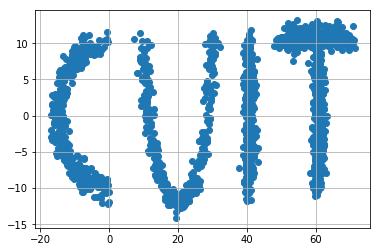

In [5]:
#################################################################################################
# Transform samples from Gaussian and Multinomial distribution to that of the 'CVIT' distribution
#################################################################################################

numSamples = 2000

z12 = np.random.randn(numSamples,2)                  # Sample [z1,z2] from Gaussian distribution
z3 = np.random.randint(5,size=(numSamples,1))     # Sample [z3] from Multinomial distribution

x = transformation_cvit(z12,z3)                      # Apply deterministic transformation

x1 = x[:,0];
x2 = x[:,1];

plt.scatter(x1,x2)
plt.hold()
plt.grid(True)

plt.show()


<hr>
<font size="2", color="SteelBlue">
While here we set the deterministic transformations ourselves, we can use deep neural networks to model these complicated transformations. We simply need to provide samples from the target distribution and the network would learn an appropriate transformation. Algorithms like <a href="https://arxiv.org/abs/1406.2661">Generative Adversarial Networks</a>, <a href="https://arxiv.org/abs/1312.6114">Variational Autoencoders</a> and  <a href="https://arxiv.org/abs/1505.03906">MMD-generative networks</a> all use deterministic neural nets to model complex density functions, albeit they use different learning criterion for training the networks.

<img src="images/transformation_1.png", width="900", align=”left”>
</font>
<hr>